In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('test').getOrCreate()
df = spark.read.csv('data/dns-requests.csv', mode="DROPMALFORMED",inferSchema=True, header = True)
df.createOrReplaceTempView("dns_requests")
distinct_subdomain_dns_requests_df = spark.sql("Select domain, count(distinct subdomain) as distinct_subdomain from dns_requests group by domain order by distinct_subdomain desc")
distinct_subdomain_dns_requests_df.show()

+---------------+------------------+
|         domain|distinct_subdomain|
+---------------+------------------+
|   blogspot.com|           9534421|
|  wordpress.com|           5562462|
|      home.blog|           2526296|
|    skyrock.com|           2060336|
| deviantart.com|            946580|
|  herokuapp.com|            849595|
|        fc2.com|            823218|
|     weebly.com|            680945|
|livejournal.com|            637255|
|     lofter.com|            415571|
|  myshopify.com|            376913|
| cloudflare.net|            345711|
|filetransit.com|            328810|
|    wixsite.com|            325492|
|  amazonaws.com|            311323|
|    soft112.com|            299266|
|      jimdo.com|            283252|
|list-manage.com|            245873|
|        wix.com|            216419|
|      food.blog|            185435|
+---------------+------------------+
only showing top 20 rows



In [21]:
distinct_subdomain_dns_requests_df.createOrReplaceTempView("distinct_dns_requests")
distinct_subdomain_histogram = spark.sql("Select distinct_subdomain, count(domain) as number_of_domains from distinct_dns_requests group by distinct_subdomain order by distinct_subdomain asc")
distinct_subdomain_histogram.show()

+------------------+-----------------+
|distinct_subdomain|number_of_domains|
+------------------+-----------------+
|                 1|         26579476|
|                 2|          8253665|
|                 3|          1806222|
|                 4|           380888|
|                 5|           309303|
|                 6|           137974|
|                 7|            84384|
|                 8|            47066|
|                 9|            35106|
|                10|            24681|
|                11|            21907|
|                12|            16477|
|                13|            18081|
|                14|            13763|
|                15|            14579|
|                16|             9517|
|                17|             8475|
|                18|             6458|
|                19|             6771|
|                20|             6569|
+------------------+-----------------+
only showing top 20 rows



In [22]:
distinct_subdomain_histogram_pd = distinct_subdomain_histogram.toPandas()
distinct_subdomain_histogram_pd

,distinct_subdomain,number_of_domains
0,1,26579476
1,2,8253665
2,3,1806222
3,4,380888
4,5,309303
...,...,...
3208,946580,1
3209,2060336,1
3210,2526296,1
3211,5562462,1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


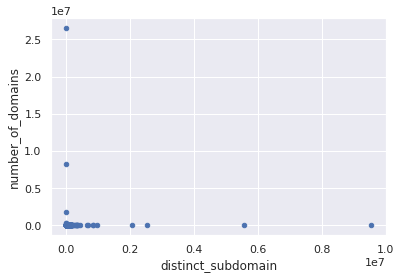

In [28]:
import matplotlib.pyplot as plt
distinct_subdomain_histogram_pd.plot(x='distinct_subdomain', y='number_of_domains',  kind = 'scatter')
plt.show()

In [ ]:
## stream the all elements and ingest them with our dwsHH algorithm
from smart_open import open
from algorithm import DistinctHeavyHitter
dwsHH = DistinctHeavyHitter(k=1000)
first_run = True
for line in open('data/dns-requests.csv.gz'):
    if first_run:
        first_run = False
        continue
    values = line.rstrip().split(',')
    if(len(values)==2):
        subdomain, domain = values
        dwsHH.ingest(subdomain, domain)

In [ ]:
dwsHH.get()



In [ ]:
all = []
for item in dwsHH.get():
    if item[2] > 0.7:
        all.append((item[0], item[1]))
sorted_by_second = sorted(all, key=lambda tup: tup[1], reverse=True)
for item in sorted_by_second:
    print("%s: %s" % (item[0], item[1]))


In [ ]:
## stream the all elements and ingest them with our dwsHH algorithm
from smart_open import open
from algorithm import DistinctHeavyHitter
dwsHH = DistinctHeavyHitter(k=500)
first_run = True
for line in open('data/dns-requests.csv.gz'):
    if first_run:
        first_run = False
        continue
    values = line.rstrip().split(',')
    if(len(values)==2):
        subdomain, domain = values
        dwsHH.ingest(subdomain, domain)

In [ ]:
dwsHH.get()



In [ ]:
all = []
for item in dwsHH.get():
    if item[2] > 0.7:
        all.append((item[0], item[1]))
sorted_by_second = sorted(all, key=lambda tup: tup[1], reverse=True)
for item in sorted_by_second:
    print("%s: %s" % (item[0], item[1]))


In [ ]:
## stream the all elements and ingest them with our dwsHH algorithm
from smart_open import open
from algorithm import DistinctHeavyHitter
dwsHH = DistinctHeavyHitter(k=2000)
first_run = True
for line in open('data/dns-requests.csv.gz'):
    if first_run:
        first_run = False
        continue
    values = line.rstrip().split(',')
    if(len(values)==2):
        subdomain, domain = values
        dwsHH.ingest(subdomain, domain)

In [ ]:
dwsHH.get()



In [ ]:
all = []
for item in dwsHH.get():
    if item[2] > 0.7:
        all.append((item[0], item[1]))
sorted_by_second = sorted(all, key=lambda tup: tup[1], reverse=True)
for item in sorted_by_second:
    print("%s: %s" % (item[0], item[1]))


In [ ]:
## stream the all elements and ingest them with our dwsHH algorithm
from smart_open import open
from algorithm import DistinctHeavyHitter
dwsHH = DistinctHeavyHitter(k=5000)
first_run = True
for line in open('data/dns-requests.csv.gz'):
    if first_run:
        first_run = False
        continue
    values = line.rstrip().split(',')
    if(len(values)==2):
        subdomain, domain = values
        dwsHH.ingest(subdomain, domain)

In [ ]:
dwsHH.get()




In [ ]:
all = []
for item in dwsHH.get():
    if item[2] > 0.7:
        all.append((item[0], item[1]))
sorted_by_second = sorted(all, key=lambda tup: tup[1], reverse=True)
for item in sorted_by_second:
    print("%s: %s" % (item[0], item[1]))


